## Practice problems for week 1

### 1. Matrix multiplication

In linear algebra if $A$ is an $M\times N$ matrix ($M$ rows and $N$ columns), we can multiply it by a vector $\bf{x}$ of length $N$ to get another vector $\bf{b}$ that is of length $M.$ We would write

$$ A\bf{x} = \bf{b}.$$

The formula for matrix multiplication is:

$$ b_i = \sum_{j=1}^{N} A_{i,j} x_j$$

where $b_i$ is the $i$th element of the vector $b$ and $A_{i,j}$ is the element of $A$ that is in the $i$th row and $j$th column. Given the matrix $A$ represented below as a list of lists and the vector $x$ represented as a list. Write a function that takes $A$ and $x$ as arguments and computes $b$.

**Disclaimer**: Never do matrix multiplication this way in real life! This is precisely the type of thing `numpy` is highly optimized for. This is only here to practice working with lists. 

In [7]:
A = [[0,2,4,8,1],[0,2,1,6,7],[0,2,1,3,9],[1,0,2,8,2], [8,1,6,5,7]]
x = [1, 2, 1, 3, 1]

In [8]:
b = []
#your code to compute b here

In [9]:
def mat_vec(A,x):
    b = len(A)*[0] #If this is confusing try it yourself to make sure you get 
                   #whats going on. This is a nice way to initiliaze lists. 
    for i in range(len(A)):
        for j in range(len(A[i])):
            b[i] += A[i][j]*x[j]
    return b

In [10]:
b = mat_vec(A,x)

In [11]:
b

[33, 30, 23, 29, 38]

In [12]:
import numpy as np

In [16]:
#Check the answer with numpy
A_arr = np.array(A)
x_arr = np.array(x)
np.matmul(A_arr,x_arr)

array([33, 30, 23, 29, 38])

### 2. Dictionary practice 

Below I load a dictionary where the keys are the name of movies in the marvel cinematic universe (circa 2017) and the values are the names of the first five actors in the movie. 

In [17]:
import numpy as np
#sorry to use numpy here but were just loading a file
marvel_movies = np.load("marvel_movies.npy", allow_pickle=True).item() 

In [18]:
marvel_movies.keys()

dict_keys(['Spider-Man 3', 'Avengers: Age of Ultron', 'The Avengers', 'The Amazing Spider-Man', 'Captain America: Civil War', 'Spider-Man 2', 'Iron Man 3', 'The Amazing Spider-Man 2', 'Iron Man', 'Iron Man 2', 'Captain America: The Winter Soldier', 'Thor: The Dark World', 'Thor', 'Spider-Man', 'Captain America: The First Avenger', 'Ant-Man'])

In [19]:
marvel_movies["Iron Man"]

['Robert Downey Jr.',
 'Terrence Howard',
 'Jeff Bridges',
 'Shaun Toub',
 'Gwyneth Paltrow']

**Part a.** Create a list that contains the names of each unique actor in this franchise.

In [20]:
unique_actors = []
for movie in marvel_movies:
    for actor in marvel_movies[movie]:
        if actor not in unique_actors:
            unique_actors.append(actor)

In [22]:
#unique_actors

**Part b.** Create a dictionary where the keys are each actors name and the values are the number of movies in which each actor has appeared. Who has appeared in the most movies?

In [23]:
appearances = {}
for actor in unique_actors:
    appearances[actor] = 0

In [24]:
for movie in marvel_movies:
    for actor in marvel_movies[movie]:
        appearances[actor] += 1

In [29]:
max_appearances = 0
max_actor = ''
# This is handy for using dictionaries. items() works like enumerate
# For each iteration, it returns the key and the value of the dict
for actor, num in appearances.items():
    if num > max_appearances:
        max_actor = actor
        max_appearances = num
print(f"{max_actor} appeared in {max_appearances} movies")

Robert Downey Jr. appeared in 6 movies


**Part c.** Challenge

- Create a dictionary that assignes a unique number starting at zero and counting up as needed. *Hint* A nifty, pythonic way of doing this would use the `unique_actors` list from the previous part and a function called `zip` which you can read about [here](https://docs.python.org/3.3/library/functions.html#zip).
- Using that dictionary, create a matrix (list of lists or if you want to try it with an array go for it) where the value of the matrix element i,j is equal to 1 if actor i and actor j appear in any movie together and zero otherwise. Such a matrix is called an [Adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) and has many very useful properties in the mathematical analysis of networks. *Note* Let's not include actors appearing in movies "with themselves." In other words, the diagonal elements of this matrix should all be zeros.

In [30]:
actor_codes = dict(zip(unique_actors,range(len(unique_actors))))

In [49]:
actor_codes

{'Tobey Maguire': 0,
 'Kirsten Dunst': 1,
 'James Franco': 2,
 'Thomas Haden Church': 3,
 'Topher Grace': 4,
 'Robert Downey Jr.': 5,
 'Chris Hemsworth': 6,
 'Mark Ruffalo': 7,
 'Chris Evans': 8,
 'Scarlett Johansson': 9,
 'Andrew Garfield': 10,
 'Emma Stone': 11,
 'Rhys Ifans': 12,
 'Denis Leary': 13,
 'Campbell Scott': 14,
 'Sebastian Stan': 15,
 'Anthony Mackie': 16,
 'Alfred Molina': 17,
 'Rosemary Harris': 18,
 'Gwyneth Paltrow': 19,
 'Don Cheadle': 20,
 'Guy Pearce': 21,
 'Rebecca Hall': 22,
 'Jamie Foxx': 23,
 'Dane DeHaan': 24,
 'Terrence Howard': 25,
 'Jeff Bridges': 26,
 'Shaun Toub': 27,
 'Mickey Rourke': 28,
 'Samuel L. Jackson': 29,
 'Robert Redford': 30,
 'Natalie Portman': 31,
 'Tom Hiddleston': 32,
 'Anthony Hopkins': 33,
 'Christopher Eccleston': 34,
 'Stellan Skarsgård': 35,
 'Willem Dafoe': 36,
 'Cliff Robertson': 37,
 'Hugo Weaving': 38,
 'Tommy Lee Jones': 39,
 'Hayley Atwell': 40,
 'Paul Rudd': 41,
 'Michael Douglas': 42,
 'Evangeline Lilly': 43,
 'Corey Stoll': 4

In [68]:
adj_mat = [[0 for i in range(len(unique_actors))] for j in range(len(unique_actors))]

In [76]:
for movie, cast in marvel_movies.items():
#     if n > 1: break
#     print(n)
#     print(cast)
    for i, actor1 in enumerate(cast):
        ind1 = actor_codes[actor1]
        for j, actor2 in enumerate(cast):
            ind2 = actor_codes[actor2]
            if i != j:
                #print(ind1,ind2)
                adj_mat[ind1][ind2] = 1

In [114]:
# #an error like this really threw me for a loop when I was writing the solutions
# #its complicated why exactly this happens but this is why you should
# #always look at the solution to check for errors. Also once we get to numpy
# #this sort of thing wont happen thank goodness.
# mat = mat = 10*[10*[0]]
# mat[0][5] = 1
# np.array(mat)

**Part d.** Even more of a challenge!

- Building upn your code from exercise 1, write a function that performs matrix matrix multiplication. Let $C$ be the product of two matrices A and B where A is $M \times N$ and B is $N \times K$. Matrix multiplication can be written as

$$ AB = C$$

$$ C_{i,j} = \sum_{n=1}^N A_{i,n}B_{n,j} $$

- Check out the section on wikipedia about [power of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers). Multiply the matrix from part c. by itself six times and interpret the result. Do all the actors in this network obey the [six degreees of separation rule](https://en.wikipedia.org/wiki/Six_degrees_of_separation)? How could you tell? I would imagine that in this case it acutually takes fewer than 6 steps to connect any actors here. What is the fewest number of steps needed to connect all actors? 

In [80]:
def mat_mat(A,B):
    #initializing the final matrix is a little more complicated 
    #the method below gives the number of rows from A and the 
    #number of columns from B
    C = [[0 for i in range(len(B[0]))] for j in range(len(A))] 
    #Note that I am being lazy and not checking the shapes
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(A[i])):
                C[i][j] += A[i][k]*B[k][j]
    return C  

In [82]:
out1 = np.array(mat_mat(adj_mat,adj_mat))
out2 = np.array(adj_mat)@np.array(adj_mat)

In [84]:
np.allclose(out1,out2) #return true if each element of the two arrays are close
                       #close not equal because we want to ignore floating point errors

True

In [86]:
powers = [adj_mat]
for k in range(1,6):
    powers.append(mat_mat(adj_mat,powers[k-1]))

In [106]:
def check_connection(m):
    connected = None
    for i in range(len(m)):
        if 0 in m[i]:
            connected = False
            break
    
    if connected:
        print("Fully Connected")
    
    else:
        print("Not connected")

In [107]:
check_connection(powers[-1])

Not connected


In [89]:
import matplotlib.pyplot as plt

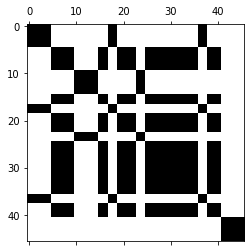

In [113]:
plt.spy(powers[-1]) #The so called sparsity pattern
plt.show()

So I was totally wrong about the structure of these movies writh respect to six degrees of separation. The spiderman movies are not the lastest ones so they are an independent cluster. Finally, Ant Man was the last movie in this dataset and those actors didn't cross over with the other Marvel movies until later on.
